In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [175]:
convos = pd.read_json('/Users/ansat.omurzakov/Downloads/updated_convs.json')

In [ ]:
easy_ids= pd.read_json('/Users/ansat.omurzakov/Desktop/easy_ids.json')

In [208]:
avia_companies = {'KLM': 56377143, 'AirFrance': 106062176, 'British_Airways': 18332190, 'AmericanAir': 22536055,
                  'Lufthansa': 124476322, 'AirBerlin': 26223583,
                  'AirBerlin assist': 2182373406, 'easyJet': 38676903, 'RyanAir': 1542862735, 'SingaporeAir': 253340062,
                  'Qantas': 218730857, 'EtihadAirways': 45621423,
                  'VirginAtlantic': 20626359}

In [209]:
hueta = convos.groupby('conv_id').count()
hueta = hueta[hueta['user_id']> 2]

In [210]:
hueta = hueta.reset_index()[['conv_id']]
hueta

,conv_id
0,0
1,6
2,8
3,9
4,11
...,...
133154,388298
133155,388299
133156,388304
133157,388305


In [211]:
convos = convos[convos['conv_id'].isin(hueta['conv_id'])]

In [212]:
cleaning = convos.drop_duplicates(subset = 'conv_id', keep = 'first')
cleaned = cleaning[cleaning['user_id'].isin(avia_companies.values())==False][['conv_id']]
convos = convos[convos['conv_id'].isin(cleaned['conv_id'])]

In [214]:
# Distribute between two datasets easy_convo and british_convo
# Get first and last sentiment and make a table out of that to see if there was a help from customer service of particular flight company


## Easy Jet how did the sentiment changed after talking with customer service?

In [215]:
easy_convos = convos[convos['for_airline_id'] == avia_companies['easyJet']].reset_index(drop = True)

In [216]:
easy_convos = easy_convos[easy_convos['user_id'] != avia_companies['easyJet']]
before_service = easy_convos.drop_duplicates(subset = 'conv_id', keep = 'first')
before_service = before_service[before_service['sentiment_label'] == 'negative']

In [217]:
len(before_service)

11729

In [218]:
after_service = easy_convos.drop_duplicates(subset = 'conv_id', keep = 'last')
after_service = after_service[after_service['conv_id'].isin(before_service['conv_id'])]

In [219]:
after_service['sentiment_label'].value_counts()

negative    6327
neutral     3278
positive    2124
Name: sentiment_label, dtype: int64

In [220]:
len(after_service)

11729

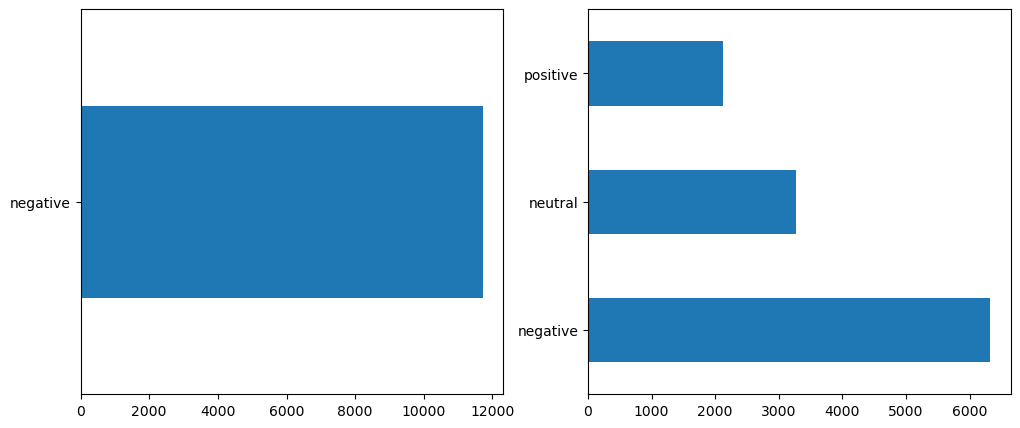

In [221]:
fig, ax = plt.subplots(nrows=1, ncols=2, squeeze=False, figsize=(12, 5))
ax_1 = before_service['sentiment_label'].value_counts().plot(kind='barh', ax=ax[0, 0])
ax_2 = after_service['sentiment_label'].value_counts().plot(kind='barh', ax=ax[0, 1])

## British Airways

In [222]:
british_convos = convos[convos['for_airline_id'] == avia_companies['British_Airways']].reset_index(drop = True)

In [223]:
british_convos = british_convos[british_convos['user_id'] != avia_companies['British_Airways']]
before_service = british_convos.drop_duplicates(subset = 'conv_id', keep = 'first')
before_service = before_service[before_service['sentiment_label'] == 'negative']

In [224]:
len(before_service)

21636

In [225]:
after_service = british_convos.drop_duplicates(subset = 'conv_id', keep = 'last')
after_service = after_service[after_service['conv_id'].isin(before_service['conv_id'])]

In [226]:
after_service['sentiment_label'].value_counts()

negative    11469
neutral      6453
positive     3714
Name: sentiment_label, dtype: int64

In [227]:
len(after_service)

21636

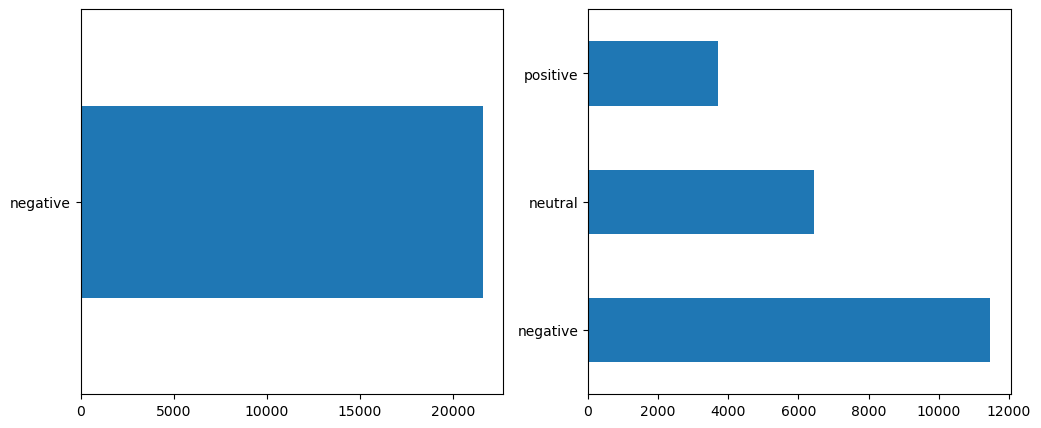

In [228]:
fig, ax = plt.subplots(nrows=1, ncols=2, squeeze=False, figsize=(12, 5))
ax_1 = before_service['sentiment_label'].value_counts().plot(kind='barh', ax=ax[0, 0])
ax_2 = after_service['sentiment_label'].value_counts().plot(kind='barh', ax=ax[0, 1])